<a href="https://colab.research.google.com/github/Md-Hasib-Askari/deep_learning_exercises/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Exercise 2: Digit Classification with ANN (MNIST Dataset)

**Objective:**  
Train a simple Artificial Neural Network (ANN) using TensorFlow/Keras to classify handwritten digits (0–9) from the **MNIST** dataset.

**✅ Key Concepts Covered:**
* Input flattening
* Dense layers and activations
* Softmax for multi-class classification
* Cross-entropy loss
* Model evaluation

### **📦 Step 1: Import Libraries**


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

### **📥 Step 2: Load and Prepare the Dataset**

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images to 784-element vectors (2D -> 1D)
# 28*28 = 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### **🧱 Step 3: Build the ANN Model**

### Available Activation Functions
---
- relu
- sigmoid
- tanh
- leakyrelu
- softmax

In [32]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (0-9)
])

### **⚙️ Step 4: Compile the Model**

In [33]:
"""
Available Optimizers
---
1. SGD (Stochastic Gradient Descent)
2. Adam (Adaptive Moment Estimation)
3. RMSprop (Root Mean Square Propagation)
4. Adagrad
5. Adadelta
6. FTRL (Follow The Regularized Leader)
7. Nadam (Nesterov-accelerated Adaptive Moment Estimation)

Available loss functions
---
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. Binary Crossentropy
4. Categorical Crossentropy
5. Sparse Categorical Crossentropy
6. Huber Loss
7. Kullback-Leibler Divergence (KL Divergence)
"""

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **📊 Step 5: Train the Model**

In [34]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8419 - loss: 0.5217 - val_accuracy: 0.9582 - val_loss: 0.1364
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9574 - loss: 0.1425 - val_accuracy: 0.9695 - val_loss: 0.1028
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9687 - loss: 0.1021 - val_accuracy: 0.9743 - val_loss: 0.0871
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0772 - val_accuracy: 0.9747 - val_loss: 0.0867
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0613 - val_accuracy: 0.9735 - val_loss: 0.0901


### **📈 Step 6: Evaluate the Model**

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1121
Test accuracy: 0.9704


### **🧪 Step 7: Predict and Visualize**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


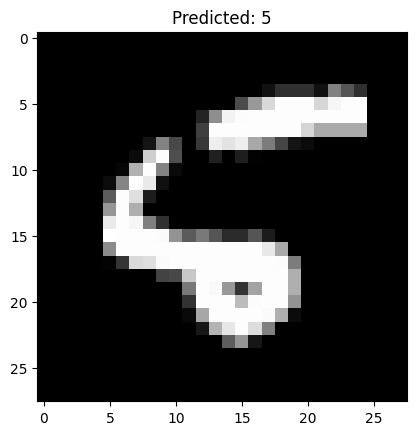

In [36]:
predictions = model.predict(x_test)

# Show some predictions
input_idx = 8
test1 = x_test[input_idx].reshape(28, 28)

plt.imshow(test1, cmap='gray')
plt.title(f"Predicted: {tf.argmax(predictions[input_idx])}")
plt.show()
